# Final Project Macine Learning
## Kelompok 1
>Anggota Kelompok:
* Nama (NIM)
* Nama (NIM)
* Nama (NIM)
* Nama (NIM)

#Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

# Import Dataset From Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/JokiDs/Adidas US Sales Datasets.xlsx')

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [ ]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop(labels=[0,1,2], axis=0)
df.columns = df.iloc[0]
df = df.drop(labels=3, axis=0)
df = df.reset_index(drop=True)

In [ ]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


# Exploratory Data Analysis

In [ ]:
#Membaca dimensi data (baris x kolom)
df.shape

(9648, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


# Data Cleaning and Preprocessing

In [ ]:
#Mengecek ada/tidaknya nilai yang kosong
df[df.isnull().any(axis=1)]

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


In [ ]:
#Menghilangkan kolom yang tidak digunakan
df = df.drop('Retailer ID',axis=1)
df = df.drop('Invoice Date',axis=1)

In [ ]:
#Mengubah nama kolom pada dataframe
df.rename(columns = {'Sales Method':'Method'}, inplace = True)

In [ ]:
#Mengubah data kategorikal menjadi data numerikal
df['Region']=pd.factorize(df.Region)[0]
df['State']=pd.factorize(df.State)[0]
df['City']=pd.factorize(df.City)[0]
df['Product']=pd.factorize(df.Product)[0]
df['Retailer']=pd.factorize(df.Retailer)[0]
df['Method']=pd.factorize(df.Method)[0]

# Multiple Linear Regression Model

In [ ]:
#X akan berisi nilai dari kolom 0 hingga 10 (indeks 0, 1, 2, 3, 4, 5, 6, 8, 9, 10).
#Ini adalah variabel independen atau fitur yang akan digunakan dalam model multiple linear regression.
X= df.values[:,(0,1,2,3,4,5,6,8,9,10)]
Y= df.values[:, 7]

In [ ]:
X

array([[0, 0, 0, ..., 300000, 0.5, 0],
       [0, 0, 0, ..., 150000, 0.3, 0],
       [0, 0, 0, ..., 140000, 0.35, 0],
       ...,
       [0, 0, 49, ..., 2791.28, 0.37000000000000005, 1],
       [0, 0, 49, ..., 1234.8000000000002, 0.42000000000000004, 1],
       [0, 0, 49, ..., 649.89, 0.27, 1]], dtype=object)

In [ ]:
X.shape


(9648, 10)

## Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Create Model and Training

In [ ]:
lr= LinearRegression()

In [ ]:
#Train Model
lr.fit(X_train, y_train)

LinearRegression()

## Predict

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([-37852.47726148,  10021.14552342,  32218.48685672, ...,
       -16465.91230961,  33284.73285914, 116745.39084331])

## Model Evaluation

In [ ]:
r2=r2_score(y_test, y_pred)

In [ ]:
r2

0.9587615824779094

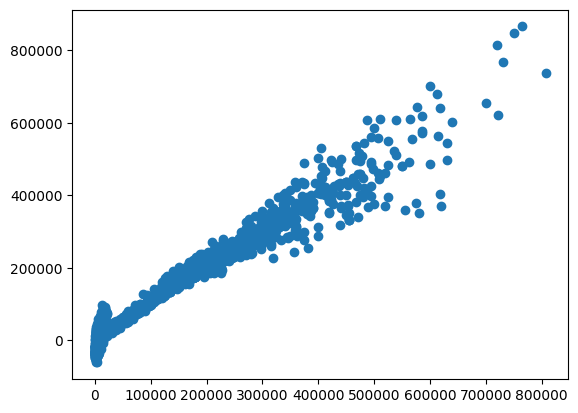

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

In [ ]:
#Menampilkan nilai intercept
print('intercept:', lr.intercept_)

intercept: 23656.612291172292


In [ ]:
def print_evaluate(true, predicted):

  mae = metrics.mean_absolute_error(true, predicted)
  mse = metrics.mean_squared_error(true, predicted)
  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
  r2_square = metrics.r2_score(true,predicted)
  print('MAE:', mae)
  print('MSE:', mse)
  print('RMSE:', rmse)
  print('R2 Square:', r2_square)
  print('__________________________________')

In [ ]:
import numpy as np
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square
Y_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)
print_evaluate(y_test, Y_pred)
print_evaluate(y_train, train_pred)

MAE: 18843.19991737108
MSE: 794462641.8805819
RMSE: 28186.213684717957
R2 Square: 0.9587615824779094
__________________________________
MAE: 19520.408014307366
MSE: 891492695.1611276
RMSE: 29857.87492707958
R2 Square: 0.9563559232630776
__________________________________


In [ ]:
results = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, Y_pred)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results


,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,18843.199917,7.944626e+08,28186.213685,0.958762
